In [1]:
import os
import numpy as np
from PIL import Image
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

# Function to load and preprocess data
def load_and_preprocess_data(train_dir, test_dir, classes):
    X_train = []
    y_train = []
    X_test = []
    y_test = []
    
    def extract_image_features(image_path):
        img = Image.open(image_path)
        img = img.resize((150, 150))
        # Convert image to grayscale and flatten
        img_array = np.array(img.convert('L')).flatten()
        return img_array
    
    # Process training images
    for label, class_name in enumerate(classes):
        class_dir = os.path.join(train_dir, class_name)
        images = os.listdir(class_dir)
        
        for image_name in images:
            image_path = os.path.join(class_dir, image_name)
            features = extract_image_features(image_path)
            X_train.append(features)
            y_train.append(label)
    
    # Process testing images
    for label, class_name in enumerate(classes):
        class_dir = os.path.join(test_dir, class_name)
        images = os.listdir(class_dir)
        
        for image_name in images:
            image_path = os.path.join(class_dir, image_name)
            features = extract_image_features(image_path)
            X_test.append(features)
            y_test.append(label)
    
    return np.array(X_train), np.array(y_train), np.array(X_test), np.array(y_test)

# Function to plot confusion matrix
def plot_confusion_matrix(cm, classes, model_name):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=classes, yticklabels=classes)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

# Function to evaluate the model
def evaluate_model_detailed(model, X_train, X_test, y_train, y_test, model_name, classes):
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calculate metrics
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    # Calculate confusion matrix
    cm = confusion_matrix(y_test, y_test_pred)
    
    # Print results
    print(f"\n{model_name} Results:")
    print(f"Training Accuracy: {train_accuracy:.4f}")
    print(f"Testing Accuracy: {test_accuracy:.4f}")
    print("\nConfusion Matrix:")
    print(cm)
    print("\nClassification Report:")
    print(classification_report(y_test, y_test_pred, target_names=classes))
    
    # Plot confusion matrix
    plot_confusion_matrix(cm, classes, model_name)
    
    return model, test_accuracy

# Main execution
if __name__ == "__main__":
    # Define paths and classes - UPDATE THESE PATHS TO MATCH YOUR DIRECTORY STRUCTURE
    train_dir = r'C:\Users\manik\Downloads\ML DATASET HENRY\Training'
    test_dir = r'C:\Users\manik\Downloads\ML DATASET HENRY\Testing'
    classes = ['glioma', 'meningioma', 'notumor', 'pituitary']
    
    # Load and preprocess data
    print("Loading and preprocessing data...")
    X_train, y_train, X_test, y_test = load_and_preprocess_data(train_dir, test_dir, classes)
    
    # Scale the features
    print("Scaling features...")
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    

    

Loading and preprocessing data...
Scaling features...



Logistic Regression Results:
Training Accuracy: 1.0000
Testing Accuracy: 0.9039

Confusion Matrix:
[[244  47   3   6]
 [ 35 251   9  11]
 [  1   4 400   0]
 [  2   7   1 290]]

Classification Report:
              precision    recall  f1-score   support

      glioma       0.87      0.81      0.84       300
  meningioma       0.81      0.82      0.82       306
     notumor       0.97      0.99      0.98       405
   pituitary       0.94      0.97      0.96       300

    accuracy                           0.90      1311
   macro avg       0.90      0.90      0.90      1311
weighted avg       0.90      0.90      0.90      1311



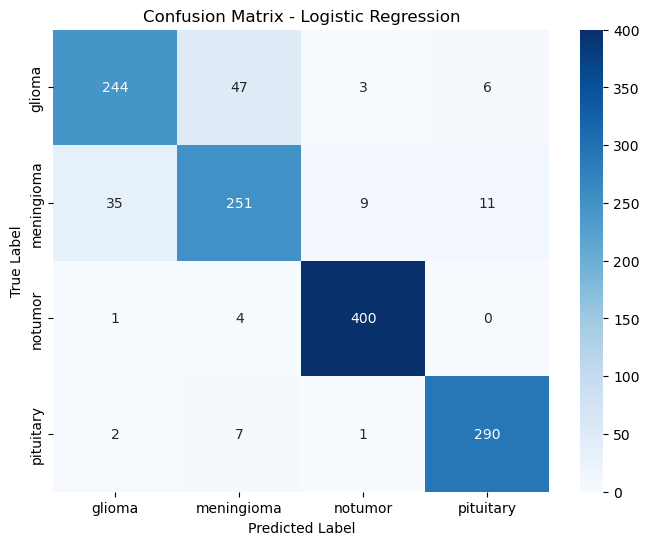

In [2]:
# Logistic Regression
lr_model = LogisticRegression(max_iter=1000)
lr_model, lr_accuracy = evaluate_model_detailed(
    lr_model, 
    X_train_scaled, 
    X_test_scaled, 
    y_train, 
    y_test, 
    "Logistic Regression",
    classes
)



Support Vector Machine Results:
Training Accuracy: 1.0000
Testing Accuracy: 0.9169

Confusion Matrix:
[[251  46   1   2]
 [ 40 256   7   3]
 [  0   2 403   0]
 [  1   7   0 292]]

Classification Report:
              precision    recall  f1-score   support

      glioma       0.86      0.84      0.85       300
  meningioma       0.82      0.84      0.83       306
     notumor       0.98      1.00      0.99       405
   pituitary       0.98      0.97      0.98       300

    accuracy                           0.92      1311
   macro avg       0.91      0.91      0.91      1311
weighted avg       0.92      0.92      0.92      1311



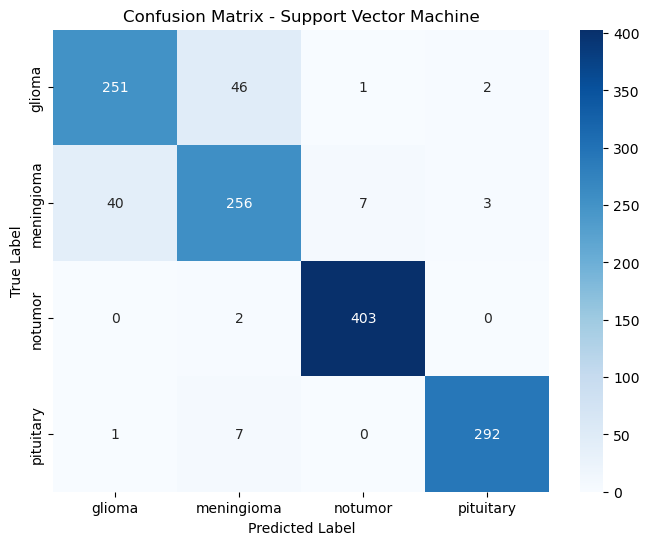

In [2]:
# Support Vector Machine (SVM)
svm_model = SVC(kernel='linear', C=1)
svm_model, svm_accuracy = evaluate_model_detailed(
    svm_model, 
    X_train_scaled, 
    X_test_scaled, 
    y_train, 
    y_test, 
    "Support Vector Machine",
    classes
)



Decision Tree Results:
Training Accuracy: 1.0000
Testing Accuracy: 0.8841

Confusion Matrix:
[[238  42   7  13]
 [ 21 261  11  13]
 [  1   5 395   4]
 [  7  26   2 265]]

Classification Report:
              precision    recall  f1-score   support

      glioma       0.89      0.79      0.84       300
  meningioma       0.78      0.85      0.82       306
     notumor       0.95      0.98      0.96       405
   pituitary       0.90      0.88      0.89       300

    accuracy                           0.88      1311
   macro avg       0.88      0.88      0.88      1311
weighted avg       0.89      0.88      0.88      1311



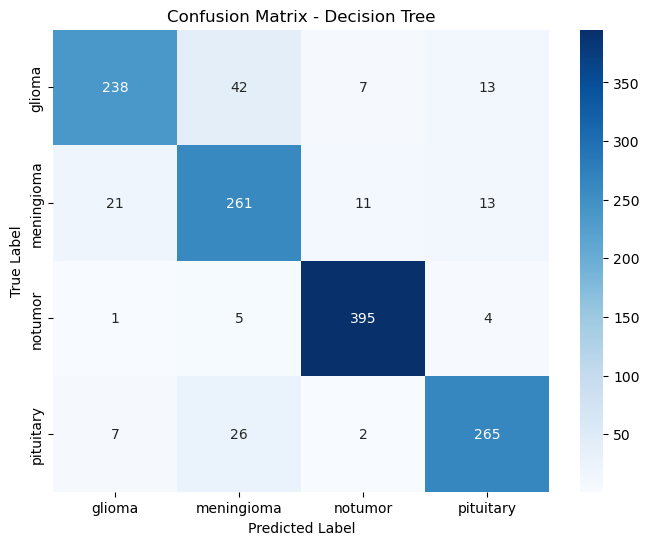

In [7]:
# Decision Tree Classifier
dt_model = DecisionTreeClassifier()
dt_model, dt_accuracy = evaluate_model_detailed(
    dt_model, 
    X_train_scaled, 
    X_test_scaled, 
    y_train, 
    y_test, 
    "Decision Tree",
    classes
)



Random Forest Results:
Training Accuracy: 1.0000
Testing Accuracy: 0.9420

Confusion Matrix:
[[254  44   0   2]
 [  6 283   8   9]
 [  0   0 405   0]
 [  2   5   0 293]]

Classification Report:
              precision    recall  f1-score   support

      glioma       0.97      0.85      0.90       300
  meningioma       0.85      0.92      0.89       306
     notumor       0.98      1.00      0.99       405
   pituitary       0.96      0.98      0.97       300

    accuracy                           0.94      1311
   macro avg       0.94      0.94      0.94      1311
weighted avg       0.94      0.94      0.94      1311



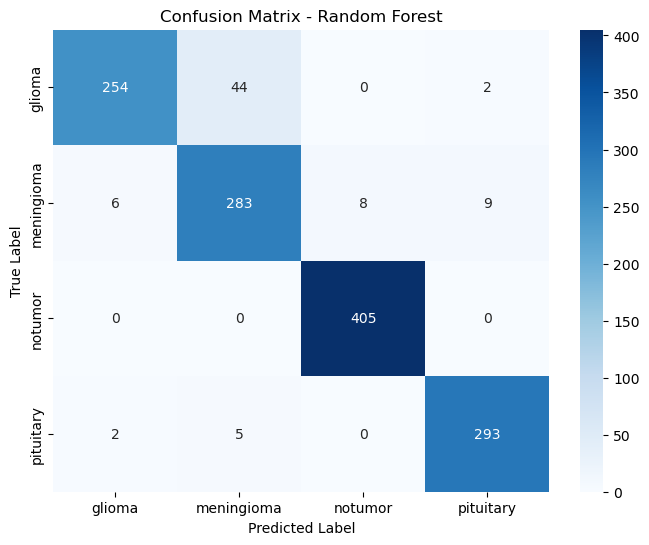

In [8]:
# Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100)
rf_model, rf_accuracy = evaluate_model_detailed(
    rf_model, 
    X_train_scaled, 
    X_test_scaled, 
    y_train, 
    y_test, 
    "Random Forest",
    classes
)



k-Nearest Neighbors Results:
Training Accuracy: 0.9608
Testing Accuracy: 0.9069

Confusion Matrix:
[[284  14   1   1]
 [ 40 222  27  17]
 [ 16   3 384   2]
 [  0   1   0 299]]

Classification Report:
              precision    recall  f1-score   support

      glioma       0.84      0.95      0.89       300
  meningioma       0.93      0.73      0.81       306
     notumor       0.93      0.95      0.94       405
   pituitary       0.94      1.00      0.97       300

    accuracy                           0.91      1311
   macro avg       0.91      0.90      0.90      1311
weighted avg       0.91      0.91      0.90      1311



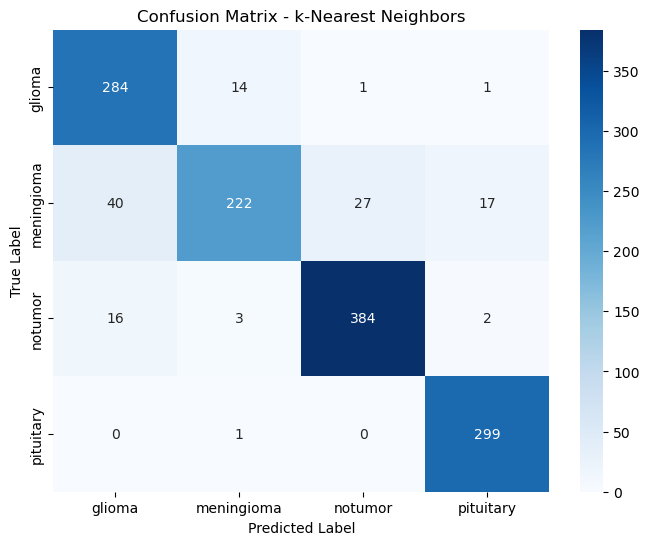

In [3]:
# k-Nearest Neighbors (kNN)
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model, knn_accuracy = evaluate_model_detailed(
    knn_model, 
    X_train_scaled, 
    X_test_scaled, 
    y_train, 
    y_test, 
    "k-Nearest Neighbors",
    classes
)



Multi-Layer Perceptron Results:
Training Accuracy: 1.0000
Testing Accuracy: 0.9344

Confusion Matrix:
[[259  38   0   3]
 [ 25 264   9   8]
 [  0   2 403   0]
 [  1   0   0 299]]

Classification Report:
              precision    recall  f1-score   support

      glioma       0.91      0.86      0.89       300
  meningioma       0.87      0.86      0.87       306
     notumor       0.98      1.00      0.99       405
   pituitary       0.96      1.00      0.98       300

    accuracy                           0.93      1311
   macro avg       0.93      0.93      0.93      1311
weighted avg       0.93      0.93      0.93      1311



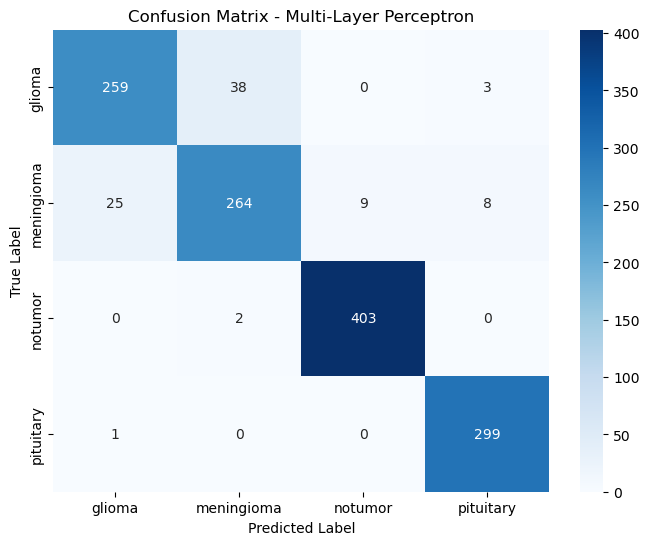

In [4]:
# Multi-Layer Perceptron (MLP)
mlp_model = MLPClassifier(max_iter=1000)
mlp_model, mlp_accuracy = evaluate_model_detailed(
    mlp_model, 
    X_train_scaled, 
    X_test_scaled, 
    y_train, 
    y_test, 
    "Multi-Layer Perceptron",
    classes
)



Naive Bayes Results:
Training Accuracy: 0.6217
Testing Accuracy: 0.5667

Confusion Matrix:
[[275   7   0  18]
 [151  38  98  19]
 [ 47 116 225  17]
 [ 69  25   1 205]]

Classification Report:
              precision    recall  f1-score   support

      glioma       0.51      0.92      0.65       300
  meningioma       0.20      0.12      0.15       306
     notumor       0.69      0.56      0.62       405
   pituitary       0.79      0.68      0.73       300

    accuracy                           0.57      1311
   macro avg       0.55      0.57      0.54      1311
weighted avg       0.56      0.57      0.54      1311



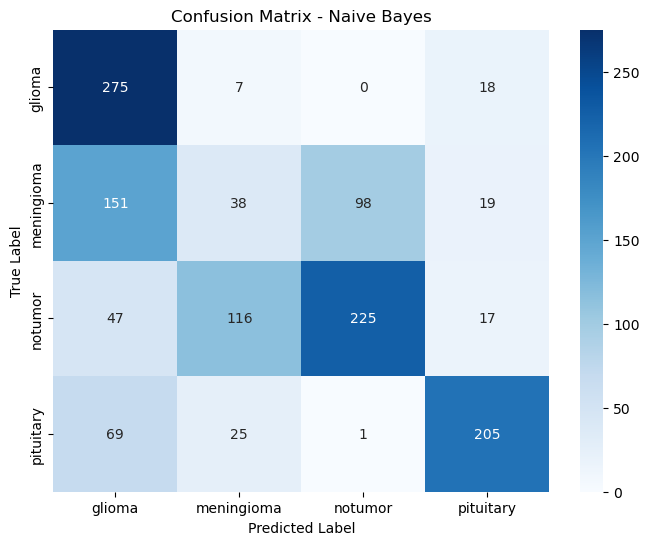

In [5]:
# Naive Bayes Classifier
nb_model = GaussianNB()
nb_model, nb_accuracy = evaluate_model_detailed(
    nb_model, 
    X_train_scaled, 
    X_test_scaled, 
    y_train, 
    y_test, 
    "Naive Bayes",
    classes
)


In [ ]:
# Dictionary to store accuracies for comparison
model_accuracies = {
    "Logistic Regression": lr_accuracy,
    "Support Vector Machine": svm_accuracy,
    "Decision Tree": dt_accuracy,
    "Random Forest": rf_accuracy,
    "k-Nearest Neighbors": knn_accuracy,
    "Multi-Layer Perceptron": mlp_accuracy,
    "Naive Bayes": nb_accuracy
}

# Plotting bar graph for comparison
plt.figure(figsize=(14, 7))
plt.barh(list(model_accuracies.keys()), list(model_accuracies.values()), color='lightgreen')
plt.xlabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.xlim(0, 1)
plt.show()
